In [1]:
from utils import *
import sqlite3
import numpy as np
import pandas as pd
from slither import Slither
from sqlalchemy import create_engine
connection = sqlite3.connect('contracts_found.db')

engine = create_engine('sqlite:///contracts_found.db')
contracts_found = pd.read_sql_query("SELECT * FROM contracts_found", connection)


verified_contracts =  pd.read_sql_query("SELECT * FROM contracts_found_enriched", connection)

try:
    contracts_found =pd.concat([contracts_found[~contracts_found.Contract.isin(verified_contracts.Contract)], verified_contracts])
    contracts_found["error"] = contracts_found.error.astype(str)
    contracts_found.drop_duplicates(subset='Contract', inplace=True)
    contracts_found.reset_index(drop=True, inplace=True)
except:
    contracts_found.drop_duplicates(subset='Contract', inplace=True)
    contracts_found.reset_index(drop=True, inplace=True)
    contracts_found['error'] = np.nan
    contracts_found['success'] = np.nan
    
print(len(contracts_found))


2178


In [2]:
sl_objects = dict()

In [4]:
contracts_found

,Unnamed: 0,index,Name,Ticker,Contract,error,success,max_price_in_eth,token_supply,max_market_cap_in_eth,get_number_funtions
0,NaN,NaN,BitFarm Protocol,BitFarm,0x5315488eF66eCa23e31238cf64b968eAa190Ec96,Invalid compilation: \nInvalid solc compilation,0.0,NaN,NaN,NaN,NaN
1,NaN,NaN,Nazare Ai,NAZA,0xdD46Db29406a71B8000F613cB62ad04d579b1854,Invalid compilation: \nInvalid solc compilatio...,0.0,NaN,NaN,NaN,NaN
2,NaN,NaN,,,0x39c973162F2af3dd7Dc8BfBEcc7fdC0b8602B979,Invalid compilation: \nInvalid solc compilation,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,Blackwing Launch Vault Token - USDC,blvtUSDC,0xB943Bd7DA6948324363025E3fE789CD02c846C86,Invalid compilation: \nInvalid solc compilation,0.0,NaN,NaN,NaN,NaN
4,NaN,NaN,Mog Coin 2.0,$MOG,0xd6Bf13548d404c72c182FF773371A23Bc432fF02,nan,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2173,NaN,NaN,Blendr Network,BLENDR,0x84018071282d4B2996272659D9C01cB08DD7327F,nan,1.0,0.0,4.200000e+07,53485.0,11.0
2174,NaN,NaN,Krick Coin,KRICK,0x4F0E058C5e8895d576390eA0b8E351F063b34f81,nan,1.0,0.0,5.000000e+06,0.0,6.0
2175,NaN,NaN,Founder,FNDR,0x155aB13F7c552C5a0856A4b67637D4b0bB456330,nan,1.0,0.0,0.000000e+00,0.0,5.0
2176,NaN,NaN,PepeTimes,PEPETIMES,0x481d9D3fF5E891d97f9070345470F8dD91D7f3F3,nan,1.0,0.0,4.206900e+02,0.0,7.0


In [ ]:
import os 
for i in range(len(contracts_found)):
    if contracts_found.loc[i, 'success'] ==1:
        continue
    if 'Unknown language: unknown' in str(contracts_found.loc[i, 'error']) or 'Symbol not found:' in str(contracts_found.loc[i, 'error']) or  'compilation' in str(contracts_found.loc[i, 'error']):
        continue
        
    import time
    
    try:
                
        contract_address = contracts_found['Contract'][i]
        print(contract_address)
        sl = Slither(contract_address, etherscan_api_key =os.environ["ETHERSCAN"])
        contracts_found.loc[i, 'success'] = 1
        sl_objects[contract_address] = sl
        time.sleep(2)
        print(1)
    except Exception as e:
        print(e)
        contracts_found.loc[i, 'success'] = 0
        contracts_found.loc[i, 'error'] = e
        time.sleep(2)


In [56]:
verified_contracts = contracts_found[contracts_found['success'] ==1].reset_index(drop=True)
verified_contracts

,Unnamed: 0,index,Name,Ticker,Contract,error,success,max_price_in_eth,token_supply,max_market_cap_in_eth,get_number_funtions
0,NaN,NaN,Mog Coin 2.0,$MOG,0xd6Bf13548d404c72c182FF773371A23Bc432fF02,nan,1.0,NaN,NaN,NaN,NaN
1,NaN,NaN,Bitz AI,BITZ,0xfC2EBc9432Bdc1DFF8b853bC8215898D48b3B1B5,nan,1.0,NaN,NaN,NaN,NaN
2,NaN,NaN,MultiMixer,MUMI,0xd5a64e5C53Aff2eDb81fF20B2984b9173F331d3B,nan,1.0,NaN,NaN,NaN,NaN
3,NaN,NaN,GameStopETH,GME,0xdD24C26043d3fb6492dfd0d71125b848F959C9Bd,nan,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,Tigra,TIGRA,0xea4B81E0Add071A8503FED2a64aeB402F48B41BE,nan,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
572,NaN,NaN,Blendr Network,BLENDR,0x84018071282d4B2996272659D9C01cB08DD7327F,nan,1.0,0.0,4.200000e+07,53485.0,11.0
573,NaN,NaN,Krick Coin,KRICK,0x4F0E058C5e8895d576390eA0b8E351F063b34f81,nan,1.0,0.0,5.000000e+06,0.0,6.0
574,NaN,NaN,Founder,FNDR,0x155aB13F7c552C5a0856A4b67637D4b0bB456330,nan,1.0,0.0,0.000000e+00,0.0,5.0
575,NaN,NaN,PepeTimes,PEPETIMES,0x481d9D3fF5E891d97f9070345470F8dD91D7f3F3,nan,1.0,0.0,4.206900e+02,0.0,7.0


In [259]:
contracts_found[(contracts_found.error.astype(str) !='Unknown language: unknown')&(contracts_found.error.astype(str) !='Symbol')].success.value_counts()

success
0.0    232
1.0    122
Name: count, dtype: int64

In [33]:
compilation_unit = sl.compilation_units[0]
# Print all the contracts from the USDT address
print([str(c) for c in compilation_unit.contracts])
# Print the most derived contracts from the USDT address
print([str(c) for c in compilation_unit.contracts_derived])

['IERC20', 'Context', 'Ownable', 'SafeMath', 'BaseToken', 'StandardToken']
['SafeMath', 'StandardToken']


In [18]:
verified_contracts['max_price_in_eth'] = np.where(verified_contracts['max_price_in_eth']==0, np.nan, verified_contracts['max_price_in_eth'])

In [ ]:
import numpy as np
# verified_contracts['max_price_in_eth'] =np.nan

for i in range(len(verified_contracts)):
    if pd.notnull(verified_contracts.loc[i, 'max_price_in_eth']):
        continue

    token_contract_address_token = verified_contracts['Contract'].values[i]

    response = get_monthly_prices_for_a_token(token_contract_address_token)
    
    try:
        if len(response.json()['data']['ethereum']['dexTrades']) == 0:
            max_price_in_eth = np.nan
        else:
            max_price_in_eth = response.json()['data']['ethereum']['dexTrades'][0]['maximum_price']

    except:
        print('error getting prices for', token_contract_address_token)
        max_price_in_eth = np.nan
    time.sleep(0.4)

    try:
        token_supply = get_supply(token_contract_address_token)
    except:
        token_supply = 0

    max_market_cap_in_eth = token_supply*max_price_in_eth
    
    verified_contracts.loc[i, 'max_price_in_eth'] = max_price_in_eth
    verified_contracts.loc[i, 'token_supply'] = token_supply
    verified_contracts.loc[i, 'max_market_cap_in_eth'] = max_market_cap_in_eth
    
    print(token_contract_address_token, max_price_in_eth, token_supply, max_market_cap_in_eth)
    


In [59]:
verified_contracts['max_market_cap_in_eth'] = verified_contracts.max_market_cap_in_eth.fillna(0).astype(int)

In [81]:
def get_number_contracts(contract_address):
    compilation_unit = sl_objects[contract_address].compilation_units[0]
    return len(pd.Series([str(c) for c in compilation_unit.contracts]))

traded_verified_contracts = verified_contracts[verified_contracts.max_price_in_eth>0]
traded_verified_contracts["number_contracts"] = traded_verified_contracts.Contract.apply(get_number_contracts)

traded_verified_contracts.reset_index(drop=True,inplace=True)

/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_669/24709949.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traded_verified_contracts["number_contracts"] = traded_verified_contracts.Contract.apply(get_number_contracts)


In [74]:
traded_verified_contracts

,Unnamed: 0,index,Name,Ticker,Contract,error,success,max_price_in_eth,token_supply,max_market_cap_in_eth,get_number_funtions,number_contracts
0,NaN,NaN,Mog Coin 2.0,$MOG,0xd6Bf13548d404c72c182FF773371A23Bc432fF02,nan,1.0,1.073031e-06,1.000000e+06,1,NaN,10
1,NaN,NaN,Bitz AI,BITZ,0xfC2EBc9432Bdc1DFF8b853bC8215898D48b3B1B5,nan,1.0,2.902866e-07,1.000000e+08,29,NaN,7
2,NaN,NaN,MultiMixer,MUMI,0xd5a64e5C53Aff2eDb81fF20B2984b9173F331d3B,nan,1.0,5.874289e-11,4.206900e+02,0,NaN,7
3,NaN,NaN,GameStopETH,GME,0xdD24C26043d3fb6492dfd0d71125b848F959C9Bd,nan,1.0,3.302954e-10,1.000000e+01,0,NaN,7
4,NaN,NaN,Tigra,TIGRA,0xea4B81E0Add071A8503FED2a64aeB402F48B41BE,nan,1.0,1.592159e-07,1.000000e+09,159,NaN,13
...,...,...,...,...,...,...,...,...,...,...,...,...
143,NaN,NaN,TensorScan AI,TSA,0xf02c2dC9b3cB7F1ba21CCd82dFf4ebC92da8996F,nan,1.0,9.972727e-04,1.000000e+06,997,NaN,8
144,NaN,NaN,0xNODE,0xN,0x7cCb616565eac43e0881C990Fe8aD212C5465675,nan,1.0,3.709921e-06,1.000000e+08,370,NaN,7
145,NaN,NaN,ApeFork,AORK,0x7597Ba40F91254190eEBF4452eB13511Cf44a0a6,nan,1.0,1.420923e-11,1.000000e+12,14,NaN,9
146,NaN,NaN,Fepe,FEPE,0xcaE33D4f643a82Af2271AD80b8F925658a328f9a,nan,1.0,4.220155e-10,3.330000e+11,140,NaN,8


In [75]:
traded_verified_contracts[traded_verified_contracts.max_market_cap_in_eth >0][["max_market_cap_in_eth", "number_contracts"]].corr()

,max_market_cap_in_eth,number_contracts
max_market_cap_in_eth,1.000000,-0.140399
number_contracts,-0.140399,1.000000


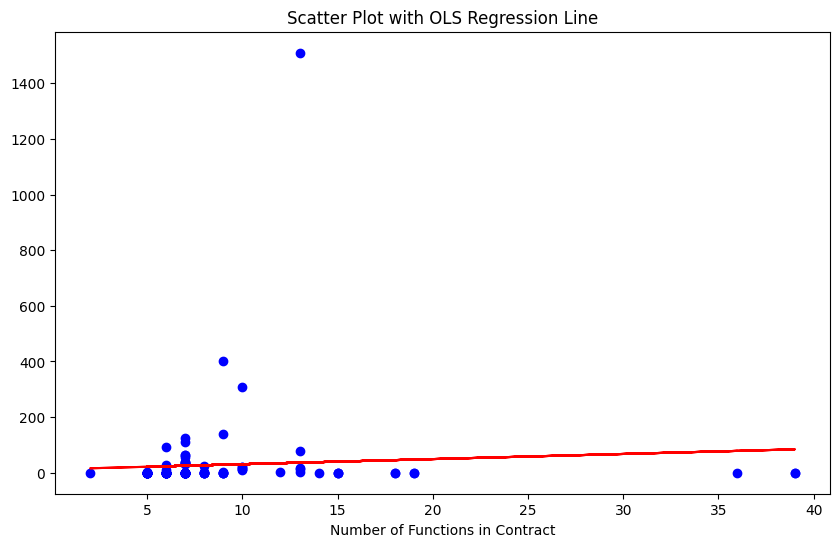

In [339]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Simulating data for demonstration
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(verified_contracts[verified_contracts.max_market_cap_in_eth <53485]['get_number_funtions'], verified_contracts[verified_contracts.max_market_cap_in_eth <53485]['max_market_cap_in_eth'], color='blue', label='Data Points')

# Linear Regression using OLS
X = sm.add_constant(verified_contracts[verified_contracts.max_market_cap_in_eth <53485]['get_number_funtions'])  # adding a constant
model = sm.OLS(verified_contracts[verified_contracts.max_market_cap_in_eth <53485]['max_market_cap_in_eth'], X).fit()
predictions = model.predict(X)

# Adding the regression line to the plot
plt.plot(verified_contracts[verified_contracts.max_market_cap_in_eth <53485]['get_number_funtions'], predictions, color='red', label='OLS Regression Line')
plt.title('Scatter Plot with OLS Regression Line')
plt.xlabel('Number of Functions in Contract')
plt.show()


In [78]:
# Initialize SQL database connection using SQLAlchemy
engine = create_engine('sqlite:///contracts_found.db')

contracts_found_enriched =pd.concat([contracts_found[~contracts_found.Contract.isin(verified_contracts.Contract)], verified_contracts])
contracts_found_enriched["error"] = contracts_found_enriched.error.astype(str)
contracts_found_enriched.to_sql('contracts_found_enriched', con=engine, index=False, if_exists='replace')


2178

In [82]:
corpus_state_variables = []
corpus_contract_names = []
index_contract_names = []
index_state_variables = []
traded_verified_contracts['count_vars'] = 0
for i in range(len(traded_verified_contracts)):
    
    contract_address = traded_verified_contracts.sort_values(by = 'max_market_cap_in_eth', ascending=False)['Contract'].values[i]
    compilation_unit = sl_objects[contract_address].compilation_units[0]    
    
    corpus_contract_names.append(" ".join([str(c) for c in compilation_unit.contracts]))
    index_contract_names.append(i)
    
    for j in range(len([str(c) for c in compilation_unit.contracts])):
        
        contract = compilation_unit.get_contract_from_name([str(c) for c in compilation_unit.contracts][j])[0]
        
        corpus_state_variables.append(" ".join([str(v) for v in contract.state_variables]))
        index_state_variables.append(i)
        traded_verified_contracts.loc[i, 'count_vars'] +=1
        
        
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = vectorizer.fit_transform(corpus_contract_names)

# Get feature names to use as dataframe column headers
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame with the TF-IDF scores
import pandas as pd
df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
df

tfidf_score_per_token_contract_names = pd.concat([df, pd.Series(index_contract_names, name='index_')], axis=1).groupby('index_').sum().sum(axis=1)

traded_verified_contracts = pd.concat([traded_verified_contracts, pd.Series(tfidf_score_per_token_contract_names, name='tfidf_score_per_token_contract_names')], axis=1)

/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_669/3715135593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traded_verified_contracts['count_vars'] = 0


In [83]:

vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = vectorizer.fit_transform(corpus_state_variables)

# Get feature names to use as dataframe column headers
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame with the TF-IDF scores
import pandas as pd
df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
df

tfidf_score_per_token_state_variables = pd.concat([df, pd.Series(index_state_variables, name='index_')], axis=1).groupby('index_').sum().sum(axis=1)

traded_verified_contracts = pd.concat([traded_verified_contracts, pd.Series(tfidf_score_per_token_state_variables, name='tfidf_score_per_token_state_variables')], axis=1)

In [51]:

traded_verified_contracts[['max_market_cap_in_eth', 'tfidf_score_per_token_contract_names']].corr()

,max_market_cap_in_eth,tfidf_score_per_token_contract_names
max_market_cap_in_eth,1.000000,0.133966
tfidf_score_per_token_contract_names,0.133966,1.000000


In [86]:
# correlation between max marketcap and the uniqueness of the contract names and state variables of a token
traded_verified_contracts[['max_market_cap_in_eth', 'tfidf_score_per_token_state_variables']].corr()

,max_market_cap_in_eth,tfidf_score_per_token_state_variables
max_market_cap_in_eth,1.000000,0.027272
tfidf_score_per_token_state_variables,0.027272,1.000000


In [87]:
traded_verified_contracts[['max_market_cap_in_eth', 
                           'tfidf_score_per_token_state_variables', 
                           'tfidf_score_per_token_contract_names', 
                           'count_vars', 
                           'number_contracts']].to_csv('training data.csv')

In [88]:
import pickle

# Assuming `sl` is your Slither object
with open('slither_object.pkl', 'wb') as file:
    pickle.dump(sl, file)


AttributeError: Can't pickle local object 'SlitherCore.__init__.<locals>.<lambda>'

In [91]:
import dill as pickle  # You can import dill as pickle for ease of use

# Assuming `sl` is your Slither object
with open('slither_object.dill', 'wb') as file:
    pickle.dump(sl, file)


In [92]:
import dill as pickle

with open('slither_object.dill', 'rb') as file:
    sl_loaded = pickle.load(file)


In [94]:
sl_loaded